# Subway Fundamental Diagram


## Data Set 
Subway Turnstile Data (by MTA)
http://web.mta.info/developers/turnstile.html

## Related work Based on Subway Turnstile Data:

>1.   New York City Subway Usage --Todd W. Schneider (public code in Ruby)<br /> 
>https://toddwschneider.com/dashboards/nyc-subway-turnstiles/

>2.   MTA Turnstile Data: Exploratory Data Analysis --Yingzhao Ouyang （public code in Python)<br />
>https://towardsdatascience.com/mta-turstile-data-my-first-taste-of-a-data-science-project-493b03f1708a

>3. MTA-turnstile-data --Atomahawk (public code in Python)<br /> 
>https://github.com/Flowinger/MTA-turnstile-data







## Data Process

Inspired by Atomahawk
>https://github.com/Flowinger/MTA-turnstile-data/blob/master/benson_code.ipynb

In [ ]:
from collections import defaultdict
from dateutil.parser import parse
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

In [ ]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [ ]:
def read_mta(file_nums):
    path ='http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    allFiles = []
    for i in file_nums:
        allFiles.append(path + i + ".txt")
    df_list = [pd.read_csv(file) for file in allFiles]
    df = pd.concat(df_list)
    df.columns = df.columns.str.strip()
    return df

In [ ]:
# September,2022 data
df = read_mta(['220924', '220917', '220910', '220903'])


In [ ]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,00:00:00,REGULAR,7764183,2740761
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,04:00:00,REGULAR,7764199,2740765
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,08:00:00,REGULAR,7764207,2740786
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,12:00:00,REGULAR,7764258,2740854
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,16:00:00,REGULAR,7764341,2740900


In [ ]:
# remove duplicates
df = df[df.DESC != 'RECOVR AUD']
df = df[df.TIME != '04:01:13']
# Sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2022,00:00:00,1
560936,R143,R032,02-00-01,TIMES SQ-42 ST,09/03/2022,16:00:00,1
560926,R143,R032,02-00-01,TIMES SQ-42 ST,09/02/2022,00:00:00,1
560927,R143,R032,02-00-01,TIMES SQ-42 ST,09/02/2022,04:00:00,1
560928,R143,R032,02-00-01,TIMES SQ-42 ST,09/02/2022,08:00:00,1


In [ ]:
df['DATETIME'] = pd.to_datetime(df.DATE + ' ' + df.TIME)
df = df.set_index(['DATETIME'])

In [ ]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
DATETIME,,,,,,,,,,,
2022-09-17 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,00:00:00,REGULAR,7764183,2740761
2022-09-17 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,04:00:00,REGULAR,7764199,2740765
2022-09-17 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,08:00:00,REGULAR,7764207,2740786
2022-09-17 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,12:00:00,REGULAR,7764258,2740854
2022-09-17 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2022,16:00:00,REGULAR,7764341,2740900


In [ ]:
df_diff = (df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'])['ENTRIES','EXITS'].max()).reset_index()
#df = df.set_index(['DATETIME'])
# subtract to obtain EXT and ENT number in period
df_diff[['ENT','EXT']] = df_diff[['ENTRIES','EXITS']].diff()
df_diff = df_diff.dropna()
df_diff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,ENT,EXT
1,A002,R051,02-00-00,59 ST,2022-08-27 04:00:00,7755375,2735700,6.0,8.0
2,A002,R051,02-00-00,59 ST,2022-08-27 08:00:00,7755385,2735729,10.0,29.0
3,A002,R051,02-00-00,59 ST,2022-08-27 12:00:00,7755434,2735792,49.0,63.0
4,A002,R051,02-00-00,59 ST,2022-08-27 16:00:00,7755526,2735831,92.0,39.0
5,A002,R051,02-00-00,59 ST,2022-08-27 20:00:00,7755625,2735861,99.0,30.0


In [ ]:
# eliminate odd value
df_diff = df_diff[(df_diff.ENT < 1500) & (df_diff.ENT > 0)]
df_diff = df_diff[(df_diff.EXT < 1500) & (df_diff.EXT > 0)]

In [ ]:
df_diff['ENT'].describe()

count    671986.000
mean         81.803
std         103.802
min           1.000
25%          13.000
50%          44.000
75%         110.000
max        1474.000
Name: ENT, dtype: float64

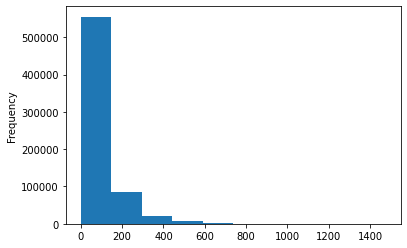

In [ ]:
df_diff['ENT'].plot(kind = 'hist')

In [ ]:
df_diff['EXT'].describe()

count    669321.000
mean        114.478
std         143.515
min           1.000
25%          21.000
50%          61.000
75%         150.000
max         999.000
Name: EXT, dtype: float64

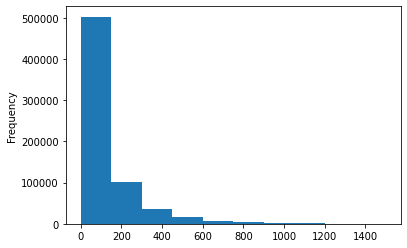

In [ ]:
df_diff['EXT'].plot(kind = 'hist')

In [ ]:
# sum up all turnstiles' value in different station and DateTime
data = (df_diff.groupby(['STATION', 'DATETIME'])['EXT','ENT'].sum()).reset_index()

In [ ]:
data

,STATION,DATETIME,EXT,ENT
0,1 AV,2022-08-27 04:00:00,1001.0,248.0
1,1 AV,2022-08-27 05:02:22,15.0,3.0
2,1 AV,2022-08-27 08:00:00,439.0,168.0
3,1 AV,2022-08-27 12:00:00,1622.0,748.0
4,1 AV,2022-08-27 16:00:00,2920.0,1137.0
...,...,...,...,...
103052,ZEREGA AV,2022-09-23 05:00:00,78.0,30.0
103053,ZEREGA AV,2022-09-23 09:00:00,384.0,627.0
103054,ZEREGA AV,2022-09-23 13:00:00,264.0,220.0
103055,ZEREGA AV,2022-09-23 17:00:00,553.0,267.0


# Origin Destination Estimation （OD Estimation)


## Iterative Proportional Fitting (IPF)

* Iterative Proportional Fitting (IPF) -- Evan Faulkner<br />
> Algarithm: https://dspace.mit.edu/handle/1721.1/37970<br />
> Code: https://github.com/evanjfaulkner/OD-Estimation/blob/main/IPF_test.ipynb





*   Use IPF to estimate OD Matrix
*   Inigtialize a random OD matrix and iterate until satisfying the marginal constratints:<br />
$$\sum_{j=1}^{N} b_i x_{ij} = B_i, \qquad \sum_{i=1}^{N} a_j x_{ij} = A_j$$
where $x_{ij}$ is the flow from stop $i$ to stop $j$, the $ij$ element of the OD matrix $X$, $B_i$ is the boarding count at stop $i$, and $A_j$ is the alighting count at stop $j$.
The IPF algorithm works by calculating row and column factors iteratively, applying the previously calculated row/column factor to solve for the next column/row factor respectively. When the factor updates converge, we calculate the entries of the IPF estimated OD matrix as the product of the row and column factors with the corresponding entry of the seed matrix.
$$\left\{\widehat{X}_{IPF}\right\}_{ij} = a_ib_j\left\{X_{seed}\right\}_{ij}$$

* Calculate Network level OD matrix

## Bayesian origin-destination estimation

Bayesian origin-destination estimation in networked transit systems using nodal in- and outflow counts  --Steffen O.P. Blume<br />
https://www.sciencedirect.com/science/article/pii/S0191261522000698#sec0030



* the aim is to identify the OD-matrix
* The instantaneous-balance Bayesian model<br />
Entry and exit count observations are in a linear relationship.
$$Y_{N \times S} =X_{N \times S} \times A_{N \times S} + \epsilon_{N\times S} $$
where Y is a matrix of size N × S and contains the number of exiting passengers at all S stations during N observations. The matrix X contains the corresponding entry count observations for all stations during the same observations.
* Point-estimation
* Formulated and solved by a constrained quadratic optimization (Appendix A.The instantaneous-balance optimisation model)



